# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other columns.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 1 
Read the dataset given in file named 'bigcity.csv'.

In [ ]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
from google.colab import files

uploaded = files.upload()

Saving bigcity.csv to bigcity (2).csv


In [2]:
# Read the file and see a few rows
import pandas as pd
data = pd.read_csv('bigcity.csv')

In [12]:
# remove the first column unnamed and print head of the data
data.drop('Unnamed: 0',1, inplace=True)
data.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# Question 2 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can use shape function to get the size of the dataframe


In [31]:
# get the shape
print(data.shape) # the data has 49 rows and 2 columns

#Reshaping to make it compatible with linear regression model
X = data[['u']] # when used with double [[]] it extracts the shape
Y = data[['x']]

print(X.shape, Y.shape)

#X = X.values.reshape(-1,1) <-- use this for reshaping the array
#Y = Y.values.reshape(-1,1) <-- use this for reshaping the array

(49, 2)
(49, 1) (49, 1)


# Question 3 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [38]:
print(data.isna().sum()) # there are no missing values

data.corr() # the data has 98.17% correlation i.e. cities which have a high population in 1920 have the same in 1930 and vice versa
# and this variable can be used as a good predictor

u    0
x    0
dtype: int64


,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u can be a good predictor of variable x

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39, 1) (39, 1)
(10, 1) (10, 1)


# Question 5 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [ ]:
#Reference link - http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Fit the linear regression model

In [58]:
from sklearn.linear_model import LinearRegression

#Apply lr model 
regr = LinearRegression() # load the model to a variable

# invoke the LinearRegression function 
regr.fit(X_train, y_train) # Fit function of the training data set

y_pred = regr.predict(X_test) # predict the test dataset

In [64]:
b1 = regr.coef_
b0 = regr.intercept_

# Let us explore the coefficients for each of the independent attributes
print(b1) 
print(b0)

[[1.15945123]]
[9.71845532]


# Question 6 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

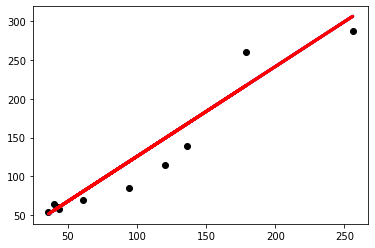

In [85]:
import matplotlib.pyplot as plt

# this below is equivalent to the regr.predict
y = b0 + b1*X_test  # coefficient is the slope and intercept is the line intercept

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
#plt.plot(X_test, y, color='red', linewidth=3) # tried plotting red and blue lines overlap
plt.show()

# Question 7 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [86]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rms = sqrt(mse)

r2Score = r2_score(y_test,y_pred)

print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 23.385235190249123 and R^2 error is 0.9181922560396981


## Question 8 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [61]:
#Train accuracy
print(f'Train Accuracy: {regr.score(X_train, y_train)}')

Train Accuracy: 0.9682175540860046


In [70]:
#Test accuracy 
print(f'Test Accuracy: {regr.score(X_test, y_test)}')

Test Accuracy: 0.9181922560396981


## Supervised Learning - Building a Student Performance Prediction System  

# Question 1 
#### The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Question 1 - Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
from google.colab import files

uploaded = files.upload()

Saving students-data.csv to students-data.csv


In [145]:
# Read dataset using pandas and print few rows
df_std = pd.read_csv('students-data.csv',sep=';')

df_std.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [146]:
#print the columns in the dataframe

print(df_std.shape)

df_std.columns

(395, 33)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [147]:
df_std.isna().sum() # no blanks

df_std.index.name = 'Number'

## Transform Data

## Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [148]:
df_std_ObjColumns = df_std.select_dtypes(include=['object']).columns
df_std_ObjColumns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [149]:
col_var = df_std.var()
cols_drop = col_var[col_var.values < 1].index
df_std.drop(columns=cols_drop, axis=1, inplace=True)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for xCol in df_std_ObjColumns:
    df_std[xCol] = le.fit_transform(df_std[xCol])

## Question 7 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [163]:
df_std['G1'] = df_std['G1'].apply(lambda x: 1 if x >=10 else 0)

In [164]:
df_std['G2'] = df_std['G2'].apply(lambda x: 1 if x >=10 else 0)

In [165]:
df_std['G3'] = df_std['G3'].apply(lambda x: 1 if x >=10 else 0)

## Question 8 - Apply the models.
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [167]:
# Target values are G3

# Feature set is remaining features
Y = df_std[['G3']]
X = df_std.drop('G3', axis=1)

## Visualization

## Question 9

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [168]:
pd.crosstab(df_std.G2,df_std.G3)

G3,0,1
G2,,
0,122,24
1,8,241



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 10

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [170]:
df_std.school.unique()

array([0, 1])

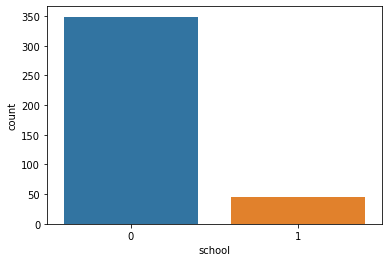

In [171]:
import seaborn as sns
sns.countplot(x='school',data=df_std)

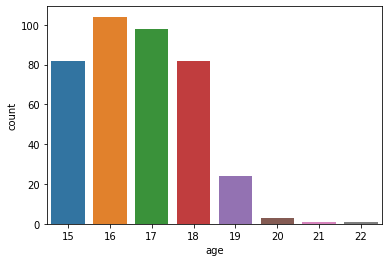

In [172]:
sns.countplot(x='age',data=df_std)

## Question 11 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [174]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300##

# Set the number of testing points
num_test = df_std.shape[0]-num_train##

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=num_test, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 12 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Logistic Regression

In [177]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')

F1 score: 0.931297709923664 and accuracy : 0.9052631578947369


C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Naive Bayes Classifier

In [178]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')

F1 score: 0.9147286821705426 and accuracy : 0.8842105263157894


C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-neighbours Classifier

In [179]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')

F1 score: 0.8226950354609929 and accuracy : 0.7368421052631579


C:\Users\v.juneja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
